# Análise de dados com Python e Pandas



### Descrição

Projeto prático do Bootcamp **Banco Carrefour Data Engineer**, realizado em parceria com a **Digital Innovation One**.

### Base utilizada

Para enfrentar o surto de COVID-19 em curso, os países estão lutando juntos vacinando os cidadãos. O conjunto de dados contém os dados de vacinação fornecidos pela OMS (por país). A base de dados utilizada pode ser encontrada no kaggle (https://www.kaggle.com/umeshkumar017/vaccination-data#).

### Análise dos dados

In [114]:
# Importando pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('fivethirtyeight')

In [115]:
# Importando pacotes
df = pd.read_csv("https://raw.githubusercontent.com/GeorgeSantos1/Datasets_Kaggle/main/vaccination-data(26-08-2021).csv")

In [116]:
# Visualizando base
df.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2021-08-20,1201286.00,770542.00,3.09,1.98,430744.00,1.11,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.00
1,Albania,ALB,EURO,OWID,2021-08-17,1340339.00,764997.00,46.58,26.58,575342.00,19.99,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,4.00
2,Algeria,DZA,AFRO,REPORTING,2021-08-23,4146091.00,3421279.00,9.46,7.80,724812.00,1.65,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",2021-01-30,3.00
3,American Samoa,ASM,WPRO,REPORTING,2021-08-09,52769.00,29210.00,95.60,52.92,24104.00,43.67,"Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfi...",2020-12-21,3.00
4,Andorra,AND,EURO,OWID,2021-08-15,91660.00,51044.00,118.63,66.06,40616.00,52.57,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,2.00


In [117]:
# Função Primeiro Quartil (25%)
def q1(x):
    return x.quantile(0.25)

# Função Terceiro Quartil (75%)
def q3(x):
    return x.quantile(0.75)

# Descritiva para variáveis de quantitativas
df.iloc[:,5:11].agg(["min",q1,"mean","median",q3,"max"]).T

,min,q1,mean,median,q3,max
TOTAL_VACCINATIONS,73.00,99878.75,20442372.89,898811.00,6258963.00,1776816416.00
PERSONS_VACCINATED_1PLUS_DOSE,37.00,69330.75,8253954.89,566050.50,3764874.75,435720056.00
TOTAL_VACCINATIONS_PER100,0.08,13.01,63.13,53.31,109.90,233.21
PERSONS_VACCINATED_1PLUS_DOSE_PER100,0.07,9.63,35.85,32.59,61.08,116.93
PERSONS_FULLY_VACCINATED,36.00,33325.00,4889511.04,324729.00,2511654.50,170138563.00
PERSONS_FULLY_VACCINATED_PER100,0.01,3.70,28.13,22.02,51.62,116.27


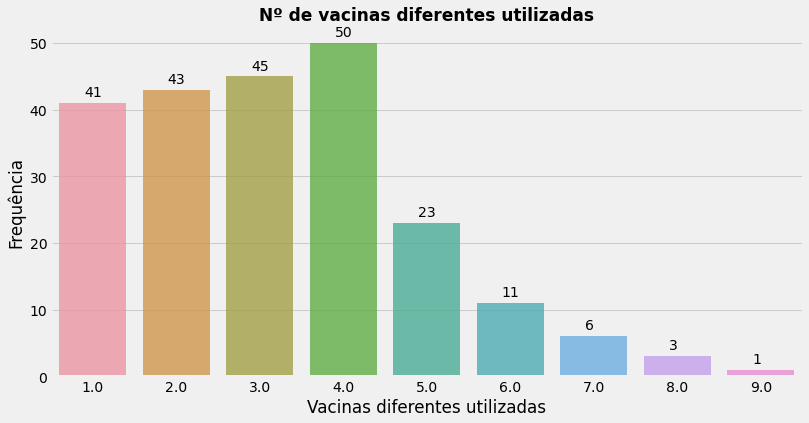

In [118]:
# Quantidade de vacinas
plt.figure(figsize=[12,6])
a1 = sns.countplot(data=df,x="NUMBER_VACCINES_TYPES_USED",alpha = 0.8)
plt.title('Nº de vacinas diferentes utilizadas',size=17,weight = 'black')
plt.ylabel('Frequência'); plt.xlabel("Vacinas diferentes utilizadas")
for p in a1.patches:
        a1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1));

In [131]:
# Top 5 Países com mais vacinações
df.loc[:,["COUNTRY","TOTAL_VACCINATIONS"]].sort_values(by="TOTAL_VACCINATIONS",ascending=False).head()

,COUNTRY,TOTAL_VACCINATIONS
42,China,1776816416.00
93,India,560652030.00
217,United States of America,361192198.00
29,Brazil,165960369.00
76,Germany,99340944.00


In [133]:
# Top 5 países com mais doses aplicadas por 100 hábitantes
df.loc[:,["COUNTRY","TOTAL_VACCINATIONS_PER100"]].sort_values(by="TOTAL_VACCINATIONS_PER100",
                                                       ascending=False).head()

,COUNTRY,TOTAL_VACCINATIONS_PER100
78,Gibraltar,233.21
215,United Arab Emirates,179.09
125,Malta,153.69
85,Guernsey,152.10
38,Cayman Islands,151.60


In [134]:
# Top 5 países com mais aplicações de primeira dose
df.loc[:,["COUNTRY","PERSONS_VACCINATED_1PLUS_DOSE"]].sort_values(by="PERSONS_VACCINATED_1PLUS_DOSE",
                                                       ascending=False).head()

,COUNTRY,PERSONS_VACCINATED_1PLUS_DOSE
93,India,435720056.00
217,United States of America,205108778.00
29,Brazil,119868047.00
130,Mexico,55643238.00
94,Indonesia,55100253.00


In [135]:
# Top 5 países com mais pessoas completamente vacinadas
df.loc[:,["COUNTRY","PERSONS_FULLY_VACCINATED"]].sort_values(by="PERSONS_FULLY_VACCINATED",
                                                       ascending=False).head()

,COUNTRY,PERSONS_FULLY_VACCINATED
217,United States of America,170138563.00
93,India,124931974.00
29,Brazil,50438096.00
76,Germany,48860871.00
202,The United Kingdom,40703769.00
